In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [37]:
RISK_FREE_RATE = 0.06
MONTHS_IN_YEAR = 12

In [44]:
class CAPM:
    def __init__(self,stocks,start_date,end_date):
        self.stocks = stocks
        self.start_date = start_date
        self.end_date = end_date
    
    def download_data(self):
        data={}
        for stock in self.stocks:
            ticker = yf.download(stock,self.start_date,self.end_date)
            data[stock] = ticker['Adj Close']
        return pd.DataFrame(data)
        
    def calculate_beta(self):
        #covariance matrix
        covariance_matrix = np.cov(self.data['s_returns'],self.data['m_returns'])
        beta = covariance_matrix[0,1]/covariance_matrix[1,1]
        print(beta)
    
    def plot_regression(self, alpha, beta):
        fig, axis = plt.subplots(1, figsize=(20, 10))
        axis.scatter(self.data["m_returns"], self.data['s_returns'],
                     label="Data Points")
        axis.plot(self.data["m_returns"], beta * self.data["m_returns"] + alpha,
                  color='red', label="CAPM Line")
        plt.title('Capital Asset Pricing Model, finding alpha and beta')
        plt.xlabel('Market return $R_m$', fontsize=18)
        plt.ylabel('Stock return $R_a$')
        plt.text(0.08, 0.05, r'$R_a = \beta * R_m + \alpha$', fontsize=18)
        plt.legend()
        plt.grid(True)
        plt.show()
        
    def calculate_beta_with_regression(self):
        #degree = 1 we are looking ofr a linear line,
        #degree = 2 we are lookign for a line to fit aquadratic equation
        beta,alpha = np.polyfit(self.data['m_returns'],self.data['s_returns'],deg=1)
        print(f'Beta:{beta}')
        expected_return = RISK_FREE_RATE + beta * (self.data['m_returns'].mean()*MONTHS_IN_YEAR - RISK_FREE_RATE)
        print(f'Expected return:{expected_return}')
        self.plot_regression(alpha, beta)
    
    def run(self):
        stock_data = self.download_data()
        stock_data = stock_data.resample('M').last()
        self.data = pd.DataFrame({'s_adjclose':stock_data[self.stocks[0]],'m_adjclose':stock_data[self.stocks[1]]})
        self.data[['s_returns','m_returns']] = np.log(self.data[['s_adjclose','m_adjclose']]/self.data[['s_adjclose','m_adjclose']].shift(1))
        self.data = self.data[1:]
       

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
1.090802479867365
Beta:1.0908024798673648
Expected return:0.15594932250751783


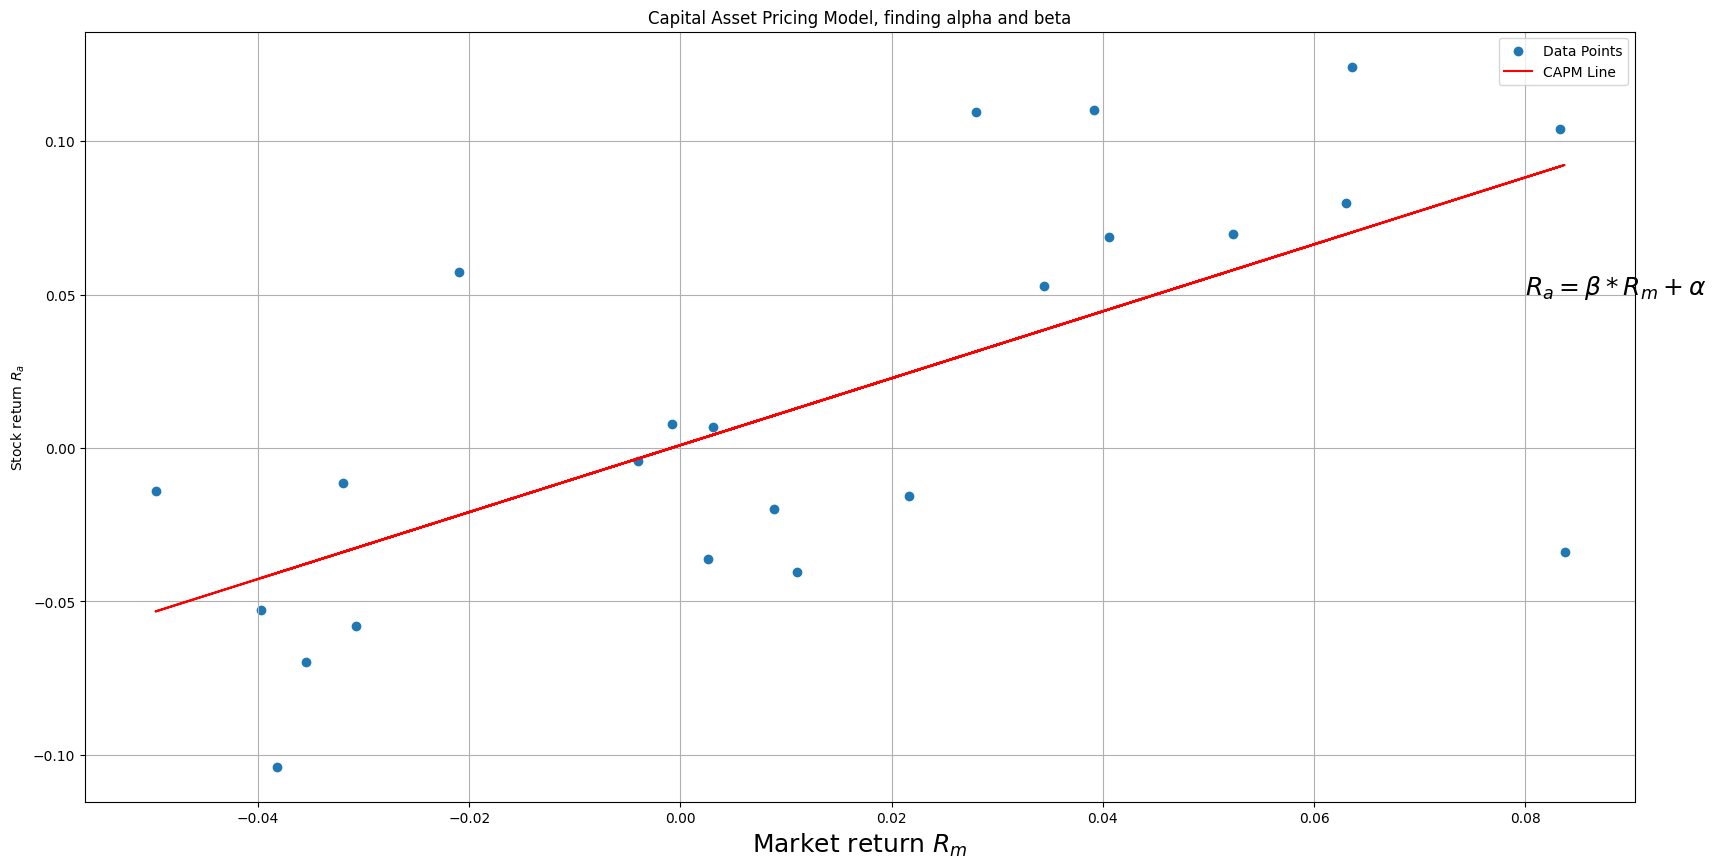

In [45]:
capm = CAPM(['RELIANCE.NS','^NSEI'],'2021-01-01','2023-01-01')
capm.run()
capm.calculate_beta()
capm.calculate_beta_with_regression()